In [261]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix  


In [262]:
arafat= pd.read_csv("/kaggle/input/spam-sms1/sms-spam.csv")

In [263]:
arafat.head(10)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"জুরং পয়েন্ট পর্যন্ত যাও, পাগলা.. শুধুমাত্র বুগ...",NaN,NaN,NaN
1,ham,ঠিক আছে... তোমার সাথে মজা করছি...,NaN,NaN,NaN
2,spam,২১শে মে ২০০৫ তারিখে FA কাপ ফাইনাল জেতার জন্য ২...,NaN,NaN,NaN
3,ham,তুমি এত তাড়াতাড়ি বলো না... তুমি ইতিমধ্যেই বল...,NaN,NaN,NaN
4,ham,"না, আমার মনে হয় না সে USF-এ যাবে, যদিও সে এখা...",NaN,NaN,NaN
5,spam,FreeMsg হে প্রিয়তমা ৩ সপ্তাহ হয়ে গেছে এবং আর...,NaN,NaN,NaN
6,ham,এমনকি আমার ভাইও আমার সাথে কথা বলতে পছন্দ করে ন...,NaN,NaN,NaN
7,ham,NaN,NaN,NaN,NaN
8,spam,আপনার অনুরোধ অনুসারে 'Melle Melle (Oru Minnami...,NaN,NaN,NaN
9,spam,WINNER!! একজন মূল্যবান নেটওয়ার্ক গ্রাহক হিসেব...,NaN,NaN,NaN


In [264]:
arafat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          611 non-null    object
 1   v2          519 non-null    object
 2   Unnamed: 2  3 non-null      object
 3   Unnamed: 3  2 non-null      object
 4   Unnamed: 4  1 non-null      object
dtypes: object(5)
memory usage: 24.0+ KB


In [265]:
arafat.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

arafat


,v1,v2
0,ham,"জুরং পয়েন্ট পর্যন্ত যাও, পাগলা.. শুধুমাত্র বুগ..."
1,ham,ঠিক আছে... তোমার সাথে মজা করছি...
2,spam,২১শে মে ২০০৫ তারিখে FA কাপ ফাইনাল জেতার জন্য ২...
3,ham,তুমি এত তাড়াতাড়ি বলো না... তুমি ইতিমধ্যেই বল...
4,ham,"না, আমার মনে হয় না সে USF-এ যাবে, যদিও সে এখা..."
...,...,...
606,spam,"আপনার জন্য সর্বশেষ নকিয়া ফোন, একটি ৪০ জিবি আই..."
607,ham,S:)তার জন্য কোন প্রতিযোগিতা নেই।
608,ham,১৫০ পেন্সের জন্য বোল্টব্লু টোন উত্তর দিন POLY#...
609,ham,আপনার ক্রেডিট http://www.bubbletext.com এর জন্...


In [266]:
arafat.rename(columns={'v1': 'result', 'v2': 'input'}, inplace=True)

arafat


,result,input
0,ham,"জুরং পয়েন্ট পর্যন্ত যাও, পাগলা.. শুধুমাত্র বুগ..."
1,ham,ঠিক আছে... তোমার সাথে মজা করছি...
2,spam,২১শে মে ২০০৫ তারিখে FA কাপ ফাইনাল জেতার জন্য ২...
3,ham,তুমি এত তাড়াতাড়ি বলো না... তুমি ইতিমধ্যেই বল...
4,ham,"না, আমার মনে হয় না সে USF-এ যাবে, যদিও সে এখা..."
...,...,...
606,spam,"আপনার জন্য সর্বশেষ নকিয়া ফোন, একটি ৪০ জিবি আই..."
607,ham,S:)তার জন্য কোন প্রতিযোগিতা নেই।
608,ham,১৫০ পেন্সের জন্য বোল্টব্লু টোন উত্তর দিন POLY#...
609,ham,আপনার ক্রেডিট http://www.bubbletext.com এর জন্...


In [267]:
encoder = LabelEncoder()
arafat['result'] = encoder.fit_transform(arafat['result'])

arafat.head()


,result,input
0,0,"জুরং পয়েন্ট পর্যন্ত যাও, পাগলা.. শুধুমাত্র বুগ..."
1,0,ঠিক আছে... তোমার সাথে মজা করছি...
2,1,২১শে মে ২০০৫ তারিখে FA কাপ ফাইনাল জেতার জন্য ২...
3,0,তুমি এত তাড়াতাড়ি বলো না... তুমি ইতিমধ্যেই বল...
4,0,"না, আমার মনে হয় না সে USF-এ যাবে, যদিও সে এখা..."


In [268]:
arafat.isnull().sum()


result     0
input     92
dtype: int64

In [269]:
arafat.duplicated().sum()


93

In [270]:
arafat = arafat.drop_duplicates(keep='first')

arafat


,result,input
0,0,"জুরং পয়েন্ট পর্যন্ত যাও, পাগলা.. শুধুমাত্র বুগ..."
1,0,ঠিক আছে... তোমার সাথে মজা করছি...
2,1,২১শে মে ২০০৫ তারিখে FA কাপ ফাইনাল জেতার জন্য ২...
3,0,তুমি এত তাড়াতাড়ি বলো না... তুমি ইতিমধ্যেই বল...
4,0,"না, আমার মনে হয় না সে USF-এ যাবে, যদিও সে এখা..."
...,...,...
606,1,"আপনার জন্য সর্বশেষ নকিয়া ফোন, একটি ৪০ জিবি আই..."
607,0,S:)তার জন্য কোন প্রতিযোগিতা নেই।
608,0,১৫০ পেন্সের জন্য বোল্টব্লু টোন উত্তর দিন POLY#...
609,0,আপনার ক্রেডিট http://www.bubbletext.com এর জন্...


In [271]:
arafat['result'].value_counts()



result
0    441
1     77
Name: count, dtype: int64

In [272]:
653*100.0/5169

12.633004449603405

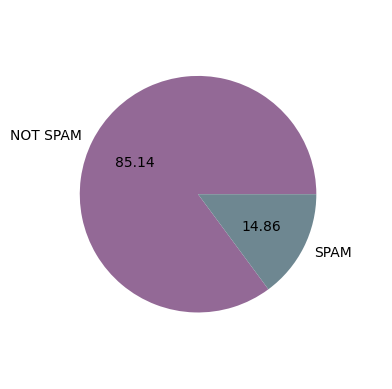

In [322]:
plt.pie(
    arafat['result'].value_counts(),
    labels=['NOT SPAM', 'SPAM'],
    autopct='%0.2f',
    radius=0.8,
    colors=['#936996', '#6e8791']
)
plt.show()


In [274]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [275]:
import pandas as pd
import nltk

arafat = arafat.copy()

arafat['input'] = arafat['input'].fillna('') 
arafat['input'] = arafat['input'].astype(str)

arafat.loc[:, 'countCharacters'] = arafat['input'].apply(len)
arafat.loc[:, 'countWords'] = arafat['input'].apply(lambda i: len(nltk.word_tokenize(i)))
arafat.loc[:, 'countSentences'] = arafat['input'].apply(lambda i: len(nltk.sent_tokenize(i)))

arafat.head()


,result,input,countCharacters,countWords,countSentences
0,0,"জুরং পয়েন্ট পর্যন্ত যাও, পাগলা.. শুধুমাত্র বুগ...",121,23,1
1,0,ঠিক আছে... তোমার সাথে মজা করছি...,33,8,1
2,1,২১শে মে ২০০৫ তারিখে FA কাপ ফাইনাল জেতার জন্য ২...,193,31,1
3,0,তুমি এত তাড়াতাড়ি বলো না... তুমি ইতিমধ্যেই বল...,50,10,1
4,0,"না, আমার মনে হয় না সে USF-এ যাবে, যদিও সে এখা...",54,14,1


In [276]:
arafat[['countCharacters', 'countWords', 'countSentences']].describe()


,countCharacters,countWords,countSentences
count,518.000000,518.000000,518.000000
mean,89.028958,17.216216,1.416988
std,64.483104,11.703112,0.965488
min,0.000000,0.000000,0.000000
25%,37.000000,8.000000,1.000000
50%,65.500000,13.000000,1.000000
75%,140.750000,26.000000,1.000000
max,404.000000,81.000000,11.000000


In [277]:
arafat[arafat['result'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()


,countCharacters,countWords,countSentences
count,441.000000,441.000000,441.000000
mean,89.419501,17.358277,1.408163
std,64.682009,11.789382,0.977625
min,0.000000,0.000000,0.000000
25%,37.000000,8.000000,1.000000
50%,66.000000,13.000000,1.000000
75%,140.000000,26.000000,1.000000
max,404.000000,81.000000,11.000000


In [278]:
arafat[arafat['result'] == 1][['countCharacters', 'countWords', 'countSentences']].describe()


,countCharacters,countWords,countSentences
count,77.000000,77.000000,77.000000
mean,86.792208,16.402597,1.467532
std,63.703123,11.235821,0.897136
min,0.000000,0.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,64.000000,12.000000,1.000000
75%,149.000000,28.000000,2.000000
max,252.000000,45.000000,5.000000


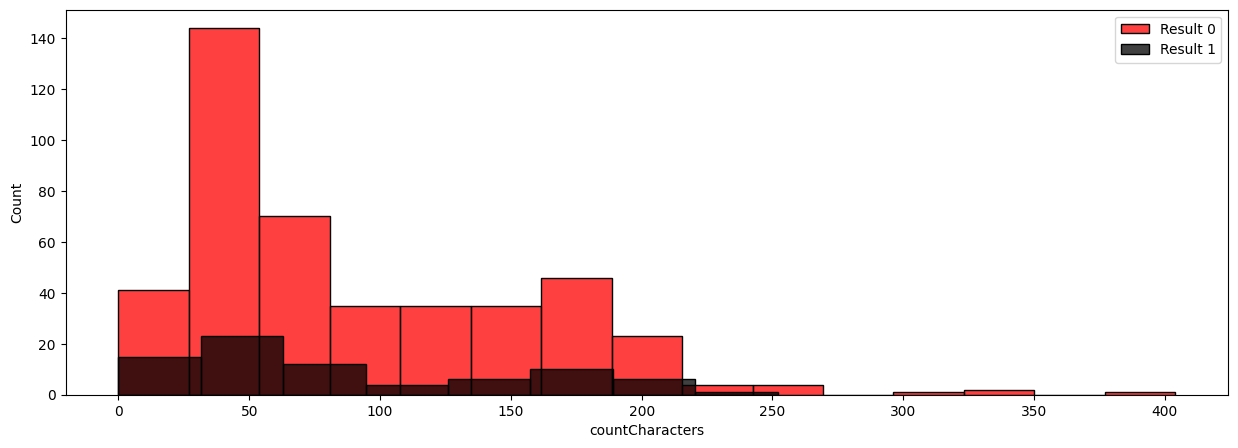

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

arafat['countCharacters'] = arafat['countCharacters'].replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(15, 5))
sns.histplot(x=arafat[arafat['result'] == 0]['countCharacters'], color="red", label="Result 0")
sns.histplot(x=arafat[arafat['result'] == 1]['countCharacters'], color="black", label="Result 1")
plt.legend()
plt.show()


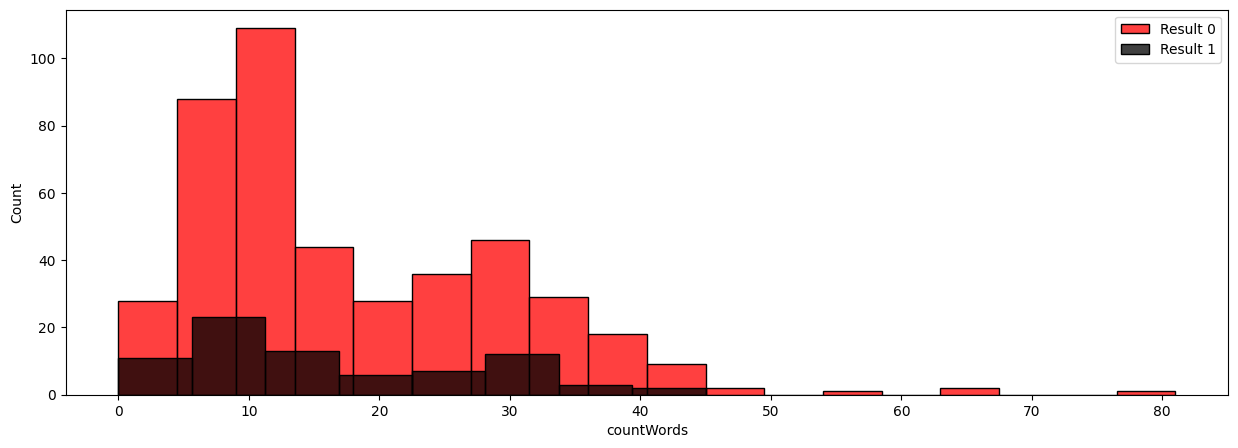

In [280]:
plt.figure(figsize=(15, 5))
sns.histplot(x=arafat[arafat['result'] == 0]['countWords'], color="red", label="Result 0")
sns.histplot(x=arafat[arafat['result'] == 1]['countWords'], color="black", label="Result 1")
plt.legend()
plt.show()


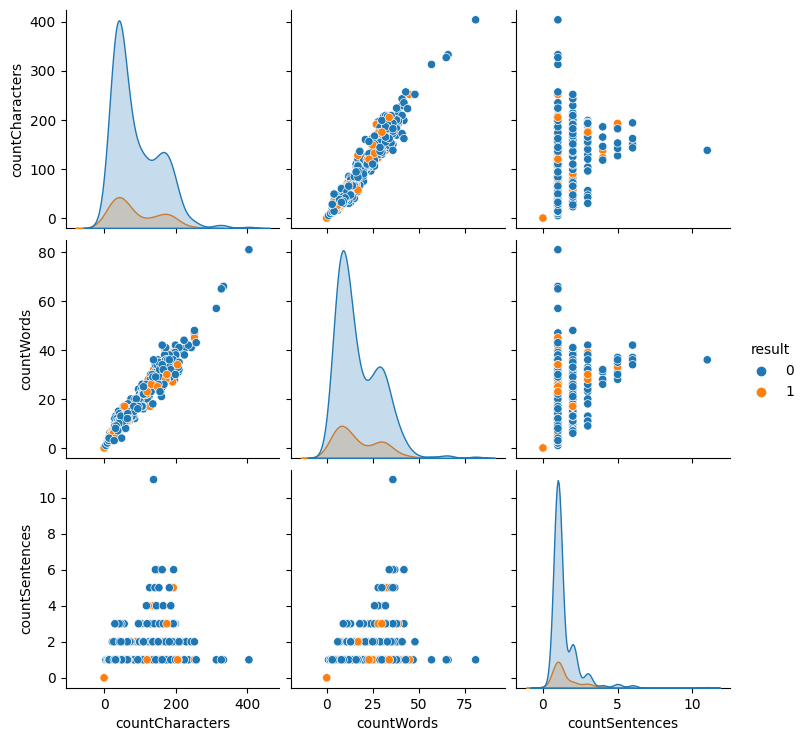

In [281]:
sns.pairplot(arafat, hue='result')


In [282]:
import pandas as pd

numeric_data = arafat.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

print(correlation_matrix)


                   result  countCharacters  countWords  countSentences
result           1.000000        -0.014508   -0.029078        0.021896
countCharacters -0.014508         1.000000    0.972012        0.336181
countWords      -0.029078         0.972012    1.000000        0.393088
countSentences   0.021896         0.336181    0.393088        1.000000


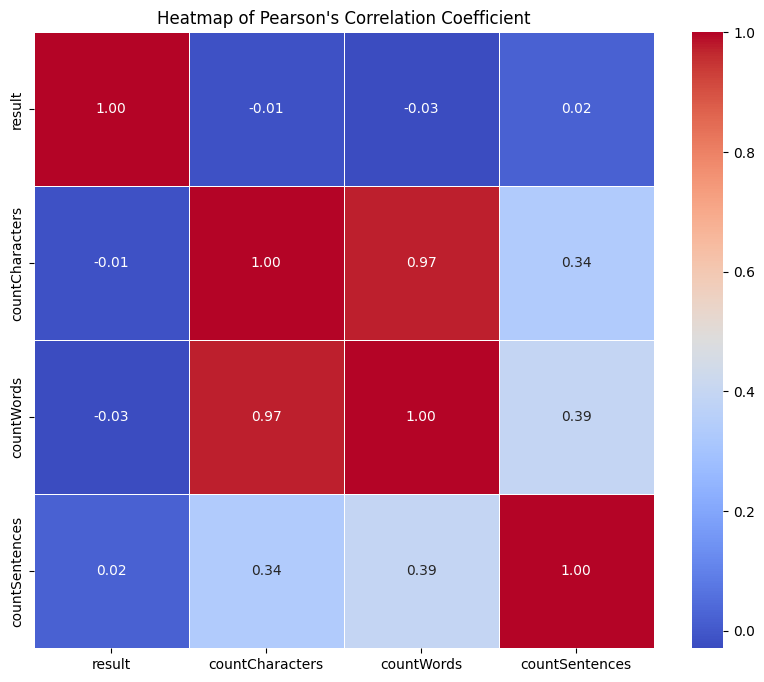

In [283]:

numeric_data = arafat.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Pearson's Correlation Coefficient")
plt.show()


In [284]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [285]:
nltk.download('stopwords')
nltk.download('punkt')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    removedSC = [i for i in text if i.isalnum()]
    removedSWPC = [i for i in removedSC if i not in stopwords.words('english') and i not in string.punctuation]
    ps = PorterStemmer()
    stemmed = [ps.stem(i) for i in removedSWPC]
    return " ".join(stemmed)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [286]:
arafat['processed'] = arafat['input'].apply(transform_text)

arafat.head()


,result,input,countCharacters,countWords,countSentences,processed
0,0,"জুরং পয়েন্ট পর্যন্ত যাও, পাগলা.. শুধুমাত্র বুগ...",121,23,1,এন ই
1,0,ঠিক আছে... তোমার সাথে মজা করছি...,33,8,1,
2,1,২১শে মে ২০০৫ তারিখে FA কাপ ফাইনাল জেতার জন্য ২...,193,31,1,২০০৫ fa ২ fa ৮৭১২১ std txt
3,0,তুমি এত তাড়াতাড়ি বলো না... তুমি ইতিমধ্যেই বল...,50,10,1,এত
4,0,"না, আমার মনে হয় না সে USF-এ যাবে, যদিও সে এখা...",54,14,1,


In [287]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

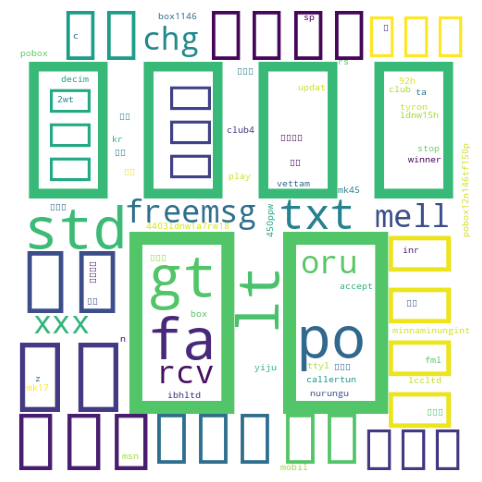

In [288]:
spamWC = wc.generate(arafat[arafat['result'] == 1]['processed'].str.cat(sep=" "))

plt.figure(figsize=(12, 6))
plt.imshow(spamWC)
plt.axis('off')
plt.show()


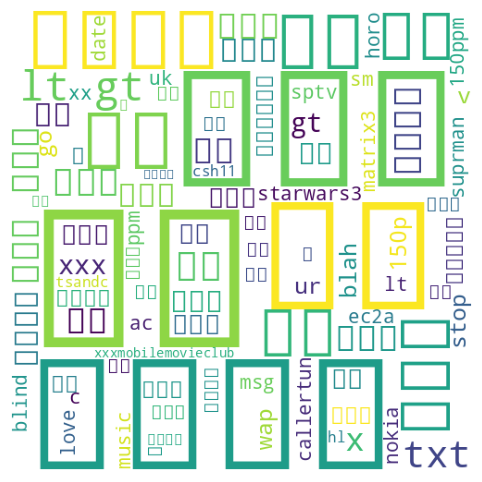

In [289]:
spamWC = wc.generate(arafat[arafat['result'] == 0]['processed'].str.cat(sep=" "))

plt.figure(figsize=(12, 6))
plt.imshow(spamWC)
plt.axis('off')
plt.show()


In [290]:
spamWords = list()

for msg in arafat[arafat['result'] == 1]['processed'].tolist():
    for word in msg.split():
        spamWords.append(word)

spamWords


['২০০৫',
 'fa',
 '২',
 'fa',
 '৮৭১২১',
 'std',
 'txt',
 'freemsg',
 '৩',
 'আর',
 'খবর',
 'এখনও',
 'xxx',
 'std',
 'chg',
 'rcv',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'সকল',
 'callertun',
 'winner',
 'একজন',
 '09061701461',
 'কল',
 '12',
 '11',
 'সহ',
 '08002986030',
 'mobil',
 'updat',
 'কল',
 '১',
 'এই',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw1a7rw18',
 'ওহ',
 'এখন',
 'ওহ',
 'যখন',
 'একই',
 'রকম',
 'এখনও',
 'ta',
 'কত',
 '৮৫০৬৯',
 'fml',
 'po',
 'box',
 '5249',
 'mk17',
 '92h',
 '450ppw',
 '16',
 'এখন',
 'আর',
 'আর',
 'এখনও',
 'এখনও',
 'এই',
 'আর',
 '82277',
 'sp',
 'tyron',
 'msn',
 'yiju',
 'এখন',
 'একজন',
 '2',
 'নগদ',
 'একজন',
 '2',
 '0871277810810',
 '৮ম',
 'inr',
 'rs',
 'lt',
 'decim',
 'gt',
 'kr',
 'lt',
 'gt',
 'এখন',
 'কখন',
 'একই',
 'এখনই',
 'এ',
 'club',
 'stop',
 '87070',
 'club4',
 'po',
 'box1146',
 'mk45',
 '2wt',
 'ওহ',
 'আরও',
 'আজ',
 'আজ',
 'accept',
 'এই',
 '২০০',
 'এখনই',
 '৮৫২২২',
 'play',
 '৮৪',
 'এম২৬',
 'কল',
 'কল',
 'আর',
 'একজ

In [291]:
spamWordsDictionary = Counter(spamWords)

spamWordsDictionary.most_common(40)


[('আর', 6),
 ('একজন', 5),
 ('কল', 5),
 ('এখনও', 4),
 ('ওহ', 4),
 ('এখন', 4),
 ('এই', 3),
 ('যখন', 3),
 ('এখনই', 3),
 ('আজ', 3),
 ('k', 3),
 ('fa', 2),
 ('std', 2),
 ('খবর', 2),
 ('একই', 2),
 ('po', 2),
 ('2', 2),
 ('lt', 2),
 ('gt', 2),
 ('কখন', 2),
 ('আরও', 2),
 ('২০০৫', 1),
 ('২', 1),
 ('৮৭১২১', 1),
 ('txt', 1),
 ('freemsg', 1),
 ('৩', 1),
 ('xxx', 1),
 ('chg', 1),
 ('rcv', 1),
 ('mell', 1),
 ('oru', 1),
 ('minnaminungint', 1),
 ('nurungu', 1),
 ('vettam', 1),
 ('সকল', 1),
 ('callertun', 1),
 ('winner', 1),
 ('09061701461', 1),
 ('12', 1)]

In [292]:
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2447 (\N{BENGALI LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtool

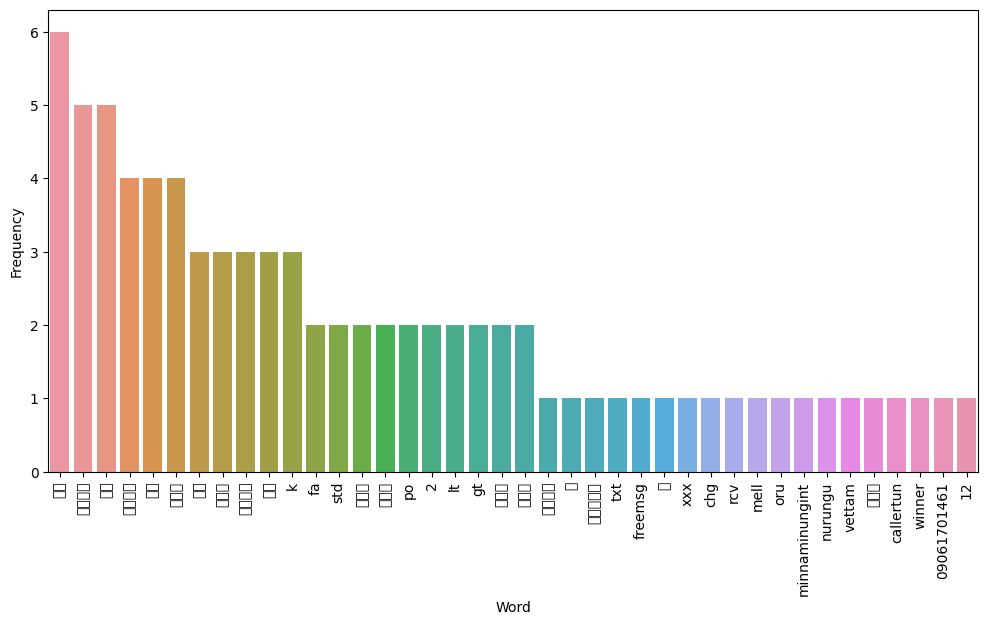

In [293]:
mostCommonSPAM = spamWordsDictionary.most_common(40)
mostCommonSPAM_df = pd.DataFrame(mostCommonSPAM, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(data=mostCommonSPAM_df, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()


In [294]:
cv = CountVectorizer()

In [295]:
arafat['processed'] = arafat['input'].apply(transform_text)

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(arafat['processed']).toarray()

print(X.shape)


(518, 367)


In [296]:
y = arafat['result'].values
y


array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [297]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)


In [298]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [299]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.38461538461538464
[[29 61]
 [ 3 11]]
0.1527777777777778


In [300]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8461538461538461
[[88  2]
 [14  0]]
0.0


In [301]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8461538461538461
[[87  3]
 [13  1]]
0.25


In [302]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf = TfidfVectorizer()

X = tf.fit_transform(arafat['processed']).toarray()

y = arafat['result'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)


In [303]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.38461538461538464
[[29 61]
 [ 3 11]]
0.1527777777777778


In [304]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8557692307692307
[[89  1]
 [14  0]]
0.0


In [305]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8461538461538461
[[87  3]
 [13  1]]
0.25


In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [307]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [308]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}


In [309]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [310]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8653846153846154
Precision -  0.5
For  KN
Accuracy -  0.8653846153846154
Precision -  0.5
For  NB
Accuracy -  0.8557692307692307
Precision -  0.0
For  DT
Accuracy -  0.8653846153846154
Precision -  0.5
For  LR
Accuracy -  0.8653846153846154
Precision -  0.5
For  RF
Accuracy -  0.8557692307692307
Precision -  0.3333333333333333
For  AdaBoost
Accuracy -  0.8557692307692307
Precision -  0.3333333333333333
For  BgC
Accuracy -  0.8557692307692307
Precision -  0.3333333333333333
For  ETC
Accuracy -  0.8557692307692307
Precision -  0.3333333333333333
For  GBDT
Accuracy -  0.8557692307692307
Precision -  0.3333333333333333


In [311]:
performance = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance

,Algorithm,Accuracy,Precision
0,SVC,0.865385,0.500000
1,KN,0.865385,0.500000
3,DT,0.865385,0.500000
4,LR,0.865385,0.500000
5,RF,0.855769,0.333333
6,AdaBoost,0.855769,0.333333
7,BgC,0.855769,0.333333
8,ETC,0.855769,0.333333
9,GBDT,0.855769,0.333333
2,NB,0.855769,0.000000


In [312]:
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [313]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('rf', rfc), ('nb', mnb), ('et', etc)],voting='soft')

In [314]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [315]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8557692307692307
Precision 0.3333333333333333


In [316]:
estimators=[('rf', rfc), ('nb', mnb), ('et', etc)]

final_estimator=ExtraTreesClassifier()

In [317]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [318]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8653846153846154
Precision 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [319]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


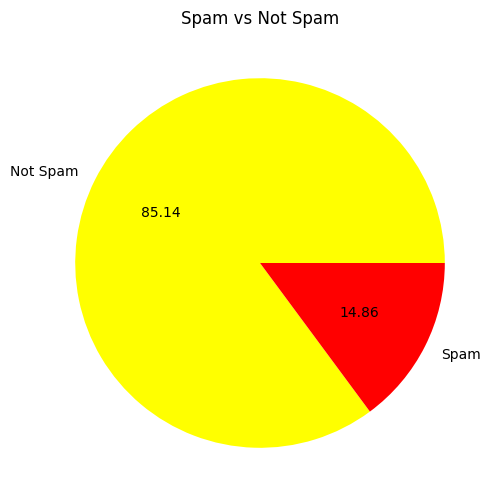

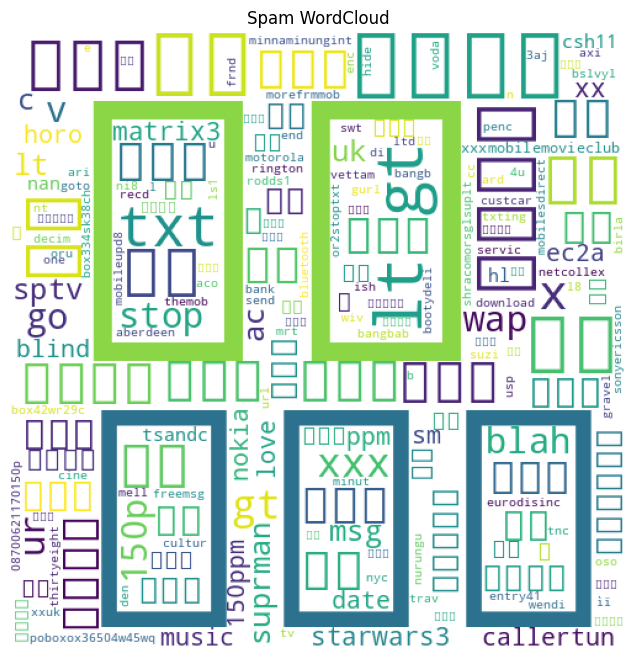

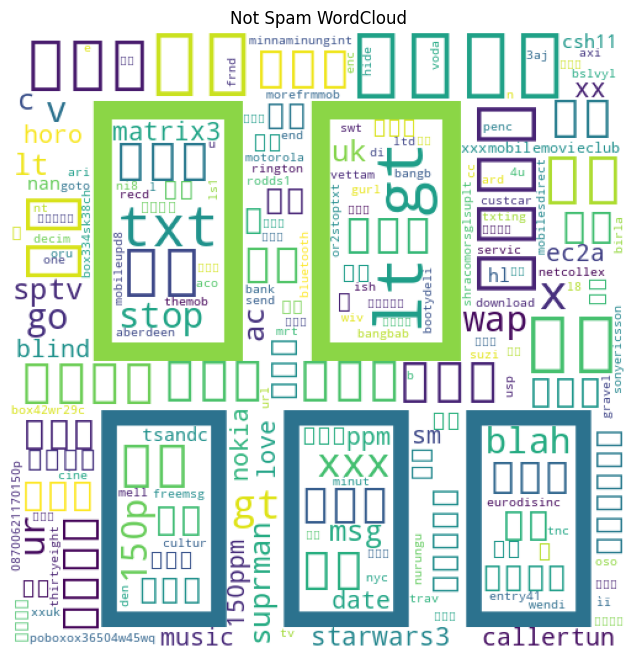

Voting Classifier Accuracy: 0.8461538461538461
Voting Classifier Precision: 0.3333333333333333
Stacking Classifier Accuracy: 0.8653846153846154
Stacking Classifier Precision: 0.6666666666666666


In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import pickle
import warnings

# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load data
data = pd.read_csv("/kaggle/input/spam-sms1/sms-spam.csv")
data = data.rename(columns={'v1': 'result', 'v2': 'input'})
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], errors='ignore')
data['result'] = data['result'].map({'ham': 0, 'spam': 1})
data = data.drop_duplicates().reset_index(drop=True)

# Text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    text = [word for word in text if word not in stopwords.words('english')]
    text = [PorterStemmer().stem(word) for word in text]
    return " ".join(text)

nltk.download('stopwords')
nltk.download('punkt')
data['processed'] = data['input'].astype(str).apply(preprocess_text)

# Exploratory Data Analysis
plt.figure(figsize=(6, 6))
plt.pie(data['result'].value_counts(), labels=['Not Spam', 'Spam'], autopct='%0.2f', colors=['yellow', 'red'])
plt.title("Spam vs Not Spam")
plt.show()

wc = WordCloud(width=500, height=500, background_color='white', min_font_size=10)
spam_wc = wc.generate(data[data['result'] == 1]['processed'].str.cat(sep=" "))
ham_wc = wc.generate(data[data['result'] == 0]['processed'].str.cat(sep=" "))

# Spam WordCloud
plt.figure(figsize=(8, 8))
plt.imshow(spam_wc)
plt.axis('off')
plt.title("Spam WordCloud")
plt.show()

# Ham WordCloud
plt.figure(figsize=(8, 8))
plt.imshow(ham_wc)
plt.axis('off')
plt.title("Not Spam WordCloud")
plt.show()

# Feature extraction
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['processed']).toarray()
y = data['result'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classifiers
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rfc), ('nb', mnb), ('et', etc)], voting='soft')
voting_clf.fit(X_train, y_train)

# Evaluation
y_pred = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Voting Classifier Precision:", precision_score(y_test, y_pred))

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rfc), ('nb', mnb), ('et', etc)],
    final_estimator=ExtraTreesClassifier(n_estimators=50, random_state=42)
)
stacking_clf.fit(X_train, y_train)

# Evaluation
y_pred_stack = stacking_clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking Classifier Precision:", precision_score(y_test, y_pred_stack))

# Save models
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(stacking_clf, open('model.pkl', 'wb'))
